### Compare Fragmenstein and XCOS scores

In [1]:
from rdkit import Chem
import pandas as pd
import numpy as np
# Import Matteo's Fragmenstein data Pandastools was being an arse....
frag_sd = Chem.SDMolSupplier('in_data/compare_xcos_fragmenstein/Fragmenstein_permissive_rescored_20200609.sdf')

In [2]:
frag_results = []
for mol in frag_sd:
    try:
        frag_results.append((mol.GetProp('_Name'),mol.GetProp('∆∆G'),mol.GetProp('%Rank'),mol.GetProp('comRMSD')))
    except:
        continue

frag_df = pd.DataFrame(frag_results[1:],columns=['Name','DeltaG','Rank','comRMSD'])


In [3]:
frag_df.head()

,Name,DeltaG,Rank,comRMSD
0,FRA-DIA-8640f307-1,-15.551701,0.014188,0.62586
1,FRA-DIA-8640f307-2,-14.355297,0.028377,0.855771
2,SIM-SYN-a98e6a07-1,-11.046305,0.042565,0.45284
3,DAV-CRI-f9b12666-9-nitrile,-11.238756,0.056754,0.853052
4,DAV-CRI-f9b12666-8-nitrile,-12.12691,0.070942,0.753703


In [4]:
# Need to get rid of nasty nan
frag_df = frag_df[~frag_df.DeltaG.str.contains("nan")]
frag_df = frag_df[~frag_df.comRMSD.str.contains("nan")]
frag_df = frag_df[~frag_df.Rank.str.contains("nan")]

In [5]:
frag_df.Rank=pd.to_numeric(frag_df.Rank)
frag_df.DeltaG=pd.to_numeric(frag_df.DeltaG)
frag_df.comRMSD=pd.to_numeric(frag_df.comRMSD)

In [6]:
# Let's only use top ranking hits to compare with XCOS (Top 140 comps)
frag_df = frag_df[frag_df.Rank < 0.72]

In [7]:
frag_df

,Name,DeltaG,Rank,comRMSD
0,FRA-DIA-8640f307-1,-15.551701,0.014188,0.625860
1,FRA-DIA-8640f307-2,-14.355297,0.028377,0.855771
2,SIM-SYN-a98e6a07-1,-11.046305,0.042565,0.452840
3,DAV-CRI-f9b12666-9-nitrile,-11.238756,0.056754,0.853052
4,DAV-CRI-f9b12666-8-nitrile,-12.126910,0.070942,0.753703
5,DAV-CRI-f9b12666-3-nitrile,-8.179375,0.085131,0.894513
6,PAU-WEI-f734c343-1-chloroacetamide,-11.446407,0.099319,0.878274
7,DAV-CRI-f9b12666-6-nitrile,-8.873388,0.113507,0.667896
8,KEN-MCD-4729dc98-1,-9.616857,0.127696,0.437956
9,DAV-CRI-f9b12666-4-nitrile,-8.974881,0.141884,0.811167


In [8]:
len(frag_df)

50

In [9]:
# Import XCOS data
xcos_sd = Chem.SDMolSupplier('in_data/compare_xcos_fragmenstein/xCOS_Teo_2020-07-07.sdf')

In [10]:
xcos_results = []
for mol in xcos_sd:
    try:
        xcos_results.append((mol.GetProp('_Name'),mol.GetProp('Score_1'),mol.GetProp('Score_2'),mol.GetProp('Score_3')))
    except:
        continue
xcos_df = pd.DataFrame(xcos_results[1:],columns=['Name','Score1','Score2','Score3'])

In [11]:
xcos_df.head()

,Name,Score1,Score2,Score3
0,FRA-DIA-8640f307-1,47.7377,4.3646,0.0914
1,FRA-DIA-8640f307-2,45.9998,3.4171,0.0743
2,SIM-SYN-a98e6a07-1,39.4837,2.4818,0.0629
3,DAV-CRI-f9b12666-9-nitrile,41.7550,3.3404,0.0800
4,DAV-CRI-f9b12666-8-nitrile,41.1029,3.0534,0.0743


In [12]:
xcos_df.Score1=pd.to_numeric(xcos_df.Score1)
xcos_df.Score2=pd.to_numeric(xcos_df.Score2)
xcos_df.Score3=pd.to_numeric(xcos_df.Score3)

In [13]:
# Let's only use top ranking hits to compare with XCOS (Top 140 comps)
xcos_df = xcos_df[xcos_df.Score1 > 33.66]

In [14]:
len(xcos_df)

251

In [15]:
xcos_df.head()

,Name,Score1,Score2,Score3
0,FRA-DIA-8640f307-1,47.7377,4.3646,0.0914
1,FRA-DIA-8640f307-2,45.9998,3.4171,0.0743
2,SIM-SYN-a98e6a07-1,39.4837,2.4818,0.0629
3,DAV-CRI-f9b12666-9-nitrile,41.7550,3.3404,0.0800
4,DAV-CRI-f9b12666-8-nitrile,41.1029,3.0534,0.0743


In [16]:
# Merge two datasets
compare_df = pd.merge(xcos_df, frag_df, how='inner', on=['Name', 'Name'])

In [17]:
len(compare_df)/len(frag_df)

0.58

In [21]:
compare_df

,Name,Score1,Score2,Score3,DeltaG,Rank,comRMSD
0,FRA-DIA-8640f307-1,47.7377,4.3646,0.0914,-15.551701,0.014188,0.625860
1,FRA-DIA-8640f307-2,45.9998,3.4171,0.0743,-14.355297,0.028377,0.855771
2,SIM-SYN-a98e6a07-1,39.4837,2.4818,0.0629,-11.046305,0.042565,0.452840
3,DAV-CRI-f9b12666-9-nitrile,41.7550,3.3404,0.0800,-11.238756,0.056754,0.853052
4,DAV-CRI-f9b12666-8-nitrile,41.1029,3.0534,0.0743,-12.126910,0.070942,0.753703
5,DAV-CRI-f9b12666-3-nitrile,40.8336,2.8000,0.0686,-8.179375,0.085131,0.894513
6,DAV-CRI-f9b12666-6-nitrile,42.7374,4.1516,0.0971,-8.873388,0.113507,0.667896
7,KEN-MCD-4729dc98-1,36.1507,2.6855,0.0743,-9.616857,0.127696,0.437956
8,DAV-CRI-f9b12666-4-nitrile,41.6197,3.0918,0.0743,-8.974881,0.141884,0.811167
9,PED-UNI-b79f0f51-2-chloroacetamide,44.4923,3.5594,0.0800,-6.498935,0.156073,0.326099


In [19]:
# Corr when all the data is used?
np.corrcoef(compare_df.Score1,compare_df.Rank)

array([[ 1.        , -0.57650546],
       [-0.57650546,  1.        ]])

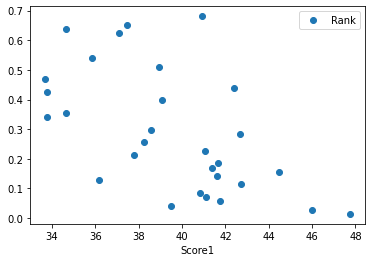

In [20]:
# Compare delat G tp Score1
compare_df.plot(x='Score1', y='Rank', style='o')